In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['axes.unicode_minus'] = False
import koreanize_matplotlib

In [52]:
master_df = pd.read_csv("/home/sprintda05/final/integrated_master_table (2).csv")


In [54]:
cohort_sizes = master_df.groupby("cohort_day")["user_id"].nunique().reset_index()


In [55]:
cohort_sizes

,cohort_day,user_id
0,2023-04-29,221
1,2023-04-30,114
2,2023-05-01,37
3,2023-05-02,73
4,2023-05-03,384
5,2023-05-04,167
6,2023-05-05,436
7,2023-05-06,183
8,2023-05-07,105
9,2023-05-08,149


In [3]:
master_df

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,...,opposite_sex_vote_received_ratio,candidate_count,chosen_count,ratio,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category
0,0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,...,0.125954,27.0,10.0,0.370370,충청남도 천안시 서북구,491,H,121,가장 어른스러운 사람은?,['심리' '성격' '인간관계']
1,1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,...,0.134111,82.0,37.0,0.451220,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['일상' '스타일' '관찰']
2,2,838642,1,1,2023-04-29,2023-04-29,0,2023-04-29,0.515152,50 이상,...,0.100000,44.0,5.0,0.113636,충청남도 천안시 서북구,491,H,161,화목한 가정을 꾸릴거 같은 사람은?,['일상' '라이프스타일' '인간관계']
3,3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,...,0.797688,42.0,10.0,0.238095,충청남도 천안시 서북구,491,H,179,책을 제일 많이 읽은 것 같은 사람은?,['일상' '지식' '관찰']
4,4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,...,0.207469,74.0,31.0,0.418919,충청남도 아산시,578,H,464,뭔가 제대로 한 번 보여줄 것 같은 사람은?,['성격' '미래' '관찰']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,4698,1510561,9,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,0.270270,NaN,NaN,NaN,경상남도 거제시,483,H,504,얘랑 있으면 시간이 너무 빨리가는것 같아,['일상' '감성' '인간관계']
4699,4699,1511957,8,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,0.583893,NaN,NaN,NaN,경기도 광명시,500,M,1576,죽기 전에 마지막으로 대화하고 싶은 사람은?,['미래' '대화' '인간관계']
4700,4700,1512422,22,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,0.196078,NaN,NaN,NaN,경상남도 거제시,483,H,604,부모님한테 가장 잘할 것 같은 친구는?,['심리' '일상' '인간관계']
4701,4701,1512542,7,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,0.333333,NaN,NaN,NaN,경상남도 거제시,483,H,1532,이 사람의 발냄새 만큼은 용서 된다,['일상' '감성' '인간관계']


In [12]:
# 중복 제거해서 cohort별 8일차 리텐션값만 뽑기
cohort_retention_df = master_df[["cohort_day", "retention_day8"]].drop_duplicates()

# 분위수 계산
q25 = cohort_retention_df["retention_day8"].quantile(0.25)
q75 = cohort_retention_df["retention_day8"].quantile(0.75)

# 상하위 25% cohort_day 리스트 추출
top25_cohorts = cohort_retention_df[cohort_retention_df["retention_day8"] >= q75]["cohort_day"].tolist()
bottom25_cohorts = cohort_retention_df[cohort_retention_df["retention_day8"] <= q25]["cohort_day"].tolist()

# 라벨링
master_df["retention_group"] = "mid"
master_df.loc[master_df["cohort_day"].isin(top25_cohorts), "retention_group"] = "top25"
master_df.loc[master_df["cohort_day"].isin(bottom25_cohorts), "retention_group"] = "bottom25"


In [22]:
master_df['retention_group']

0         mid
1       top25
2         mid
3         mid
4         mid
        ...  
4698      mid
4699      mid
4700      mid
4701      mid
4702      mid
Name: retention_group, Length: 4703, dtype: object

In [23]:
# 그룹별 유저 수 계산
user_counts = master_df["retention_group"].value_counts().rename("user_count")

# 그룹별 cohort_day 수 계산
cohort_counts = (
    master_df[["retention_group", "cohort_day"]]
    .drop_duplicates()
    .groupby("retention_group")
    .size()
    .rename("cohort_day_count")
)

In [25]:
summary = pd.concat([user_counts, cohort_counts], axis=1).reset_index().rename(columns={"index": "retention_group"})


In [26]:
summary

,retention_group,user_count,cohort_day_count
0,mid,2206,13
1,top25,1253,7
2,bottom25,1244,7


In [28]:
# top25 그룹에 포함된 날짜
top25_dates = sorted(master_df.loc[master_df["retention_group"] == "top25", "cohort_day"].unique())
print(" Top25 Cohort Dates:")
print(top25_dates)

# bottom25 그룹에 포함된 날짜
bottom25_dates = sorted(master_df.loc[master_df["retention_group"] == "bottom25", "cohort_day"].unique())
print("\n Bottom25 Cohort Dates:")
print(bottom25_dates)

# mid 그룹에 포함된 날짜
mid_dates = sorted(master_df.loc[master_df["retention_group"] == "mid", "cohort_day"].unique())
print("\n Mid Cohort Dates:")
print(mid_dates)

 Top25 Cohort Dates:
['2023-04-30', '2023-05-02', '2023-05-09', '2023-05-10', '2023-05-12', '2023-05-20', '2023-05-21']

 Bottom25 Cohort Dates:
['2023-05-04', '2023-05-05', '2023-05-06', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-24']

 Mid Cohort Dates:
['2023-04-29', '2023-05-01', '2023-05-03', '2023-05-07', '2023-05-08', '2023-05-11', '2023-05-13', '2023-05-14', '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-25']


In [32]:
master_df.to_csv("master-v2.csv", index=False)

In [29]:
master_df

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,...,candidate_count,chosen_count,ratio,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category,retention_group
0,0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,...,27.0,10.0,0.370370,충청남도 천안시 서북구,491,H,121,가장 어른스러운 사람은?,['심리' '성격' '인간관계'],mid
1,1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,...,82.0,37.0,0.451220,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['일상' '스타일' '관찰'],top25
2,2,838642,1,1,2023-04-29,2023-04-29,0,2023-04-29,0.515152,50 이상,...,44.0,5.0,0.113636,충청남도 천안시 서북구,491,H,161,화목한 가정을 꾸릴거 같은 사람은?,['일상' '라이프스타일' '인간관계'],mid
3,3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,...,42.0,10.0,0.238095,충청남도 천안시 서북구,491,H,179,책을 제일 많이 읽은 것 같은 사람은?,['일상' '지식' '관찰'],mid
4,4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,...,74.0,31.0,0.418919,충청남도 아산시,578,H,464,뭔가 제대로 한 번 보여줄 것 같은 사람은?,['성격' '미래' '관찰'],mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,4698,1510561,9,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,NaN,NaN,NaN,경상남도 거제시,483,H,504,얘랑 있으면 시간이 너무 빨리가는것 같아,['일상' '감성' '인간관계'],mid
4699,4699,1511957,8,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,NaN,NaN,NaN,경기도 광명시,500,M,1576,죽기 전에 마지막으로 대화하고 싶은 사람은?,['미래' '대화' '인간관계'],mid
4700,4700,1512422,22,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,NaN,NaN,NaN,경상남도 거제시,483,H,604,부모님한테 가장 잘할 것 같은 친구는?,['심리' '일상' '인간관계'],mid
4701,4701,1512542,7,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,...,NaN,NaN,NaN,경상남도 거제시,483,H,1532,이 사람의 발냄새 만큼은 용서 된다,['일상' '감성' '인간관계'],mid


In [31]:
group_mean = master_df.groupby("retention_group")["votes_within_3d_count"].mean()
print(group_mean)

retention_group
bottom25    106.104502
mid         106.570263
top25       107.517159
Name: votes_within_3d_count, dtype: float64


In [37]:
top_bottom_df = master_df[master_df["retention_group"].isin(["top25", "bottom25"])].copy()


In [38]:
top_bottom_df

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,...,candidate_count,chosen_count,ratio,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category,retention_group
1,1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,...,82.0,37.0,0.451220,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['일상' '스타일' '관찰'],top25
7,7,840512,131,7,2023-05-02,2023-05-16,14,2023-05-02,0.569444,50 이상,...,90.0,28.0,0.311111,충청남도 아산시,578,H,219,마술이 눈속임이 아니라 마법이라고 생각할 것 같은 사람은?,['심리' '감성' '상상'],top25
8,8,840685,547,16,2023-05-02,2023-05-23,21,2023-05-02,0.569444,50 이상,...,102.0,27.0,0.264706,충청남도 아산시,578,H,120,본인 방이 제일 깨끗할거 같은 사람은?,['일상' '스타일' '관찰'],top25
9,9,840902,245,13,2023-05-02,2023-05-17,15,2023-05-02,0.569444,50 이상,...,86.0,18.0,0.209302,충청남도 아산시,578,H,332,선물 고르는 센스가 가장 좋을 것 같은 사람은?,['일상' '스타일' '관찰'],top25
11,11,841576,227,11,2023-05-09,2023-05-21,12,2023-05-09,0.731602,50 이상,...,89.0,23.0,0.258427,경기도 광주시,486,H,410,발냄새가 호두과자 냄새일 것 같은 사람은?,['일상' '상상' '관찰'],top25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,4672,1497413,118,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,50 미만,...,11.0,7.0,0.636364,경상남도 거제시,483,H,1046,졸업 후 동창회에서 청첩장 돌릴 것 같은 친구는?,['일상' '미래' '인간관계'],bottom25
4673,4673,1497699,15,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,50 미만,...,NaN,NaN,NaN,충청남도 천안시 서북구,491,H,336,제대로 놀 때 부르고 싶은 친구는?,['일상' '라이프스타일' '인간관계'],bottom25
4674,4674,1498168,30,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,50 미만,...,8.0,1.0,0.125000,경상남도 거제시,483,H,911,답장 속도가 가장 빠른 사람은?,['일상' '대화' '인간관계'],bottom25
4675,4675,1498266,4,1,2023-05-24,2023-05-24,0,2023-05-24,0.294118,50 미만,...,NaN,NaN,NaN,울산광역시 울주군,550,H,914,예술감각이 가장 뛰어난 친구는?,['성격' '관찰' '인간관계'],bottom25


In [39]:
group_mean = top_bottom_df.groupby("retention_group")["votes_within_3d_count"].mean()
print(group_mean)

retention_group
bottom25    106.104502
top25       107.517159
Name: votes_within_3d_count, dtype: float64


/tmp/ipykernel_582262/3503272074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


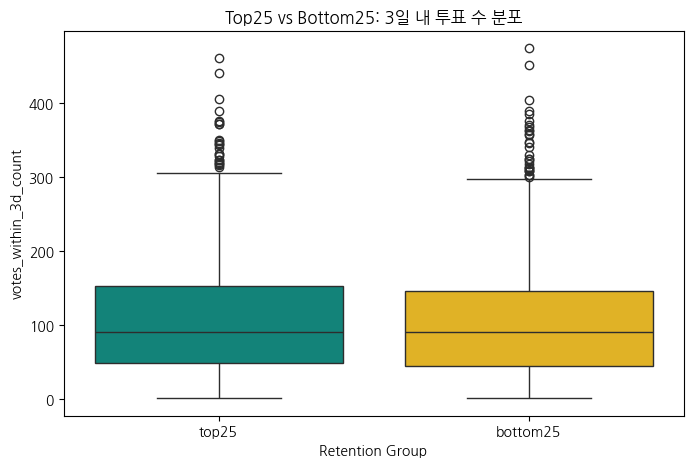

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=top_bottom_df,
    x="retention_group",
    y="votes_within_3d_count",
    palette={"top25": "#009688", "bottom25": "#ffc107"}
)
plt.title("Top25 vs Bottom25: 3일 내 투표 수 분포")
plt.ylabel("votes_within_3d_count")
plt.xlabel("Retention Group")
plt.show()

In [41]:
from scipy.stats import ttest_ind

# 두 그룹 분리
top25_vals = top_bottom_df[top_bottom_df["retention_group"] == "top25"]["votes_within_3d_count"]
bottom25_vals = top_bottom_df[top_bottom_df["retention_group"] == "bottom25"]["votes_within_3d_count"]

In [ ]:
t_stat, p_val = ttest_ind(top25_vals, bottom25_vals, equal_var=False)  

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

t-statistic: 0.4490
p-value: 0.6534


In [43]:
top_bottom_df.to_csv("master-top_bottom.csv", index=False)

In [44]:
top_bottom_df

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,...,candidate_count,chosen_count,ratio,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category,retention_group
1,1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,...,82.0,37.0,0.451220,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['일상' '스타일' '관찰'],top25
7,7,840512,131,7,2023-05-02,2023-05-16,14,2023-05-02,0.569444,50 이상,...,90.0,28.0,0.311111,충청남도 아산시,578,H,219,마술이 눈속임이 아니라 마법이라고 생각할 것 같은 사람은?,['심리' '감성' '상상'],top25
8,8,840685,547,16,2023-05-02,2023-05-23,21,2023-05-02,0.569444,50 이상,...,102.0,27.0,0.264706,충청남도 아산시,578,H,120,본인 방이 제일 깨끗할거 같은 사람은?,['일상' '스타일' '관찰'],top25
9,9,840902,245,13,2023-05-02,2023-05-17,15,2023-05-02,0.569444,50 이상,...,86.0,18.0,0.209302,충청남도 아산시,578,H,332,선물 고르는 센스가 가장 좋을 것 같은 사람은?,['일상' '스타일' '관찰'],top25
11,11,841576,227,11,2023-05-09,2023-05-21,12,2023-05-09,0.731602,50 이상,...,89.0,23.0,0.258427,경기도 광주시,486,H,410,발냄새가 호두과자 냄새일 것 같은 사람은?,['일상' '상상' '관찰'],top25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,4672,1497413,118,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,50 미만,...,11.0,7.0,0.636364,경상남도 거제시,483,H,1046,졸업 후 동창회에서 청첩장 돌릴 것 같은 친구는?,['일상' '미래' '인간관계'],bottom25
4673,4673,1497699,15,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,50 미만,...,NaN,NaN,NaN,충청남도 천안시 서북구,491,H,336,제대로 놀 때 부르고 싶은 친구는?,['일상' '라이프스타일' '인간관계'],bottom25
4674,4674,1498168,30,2,2023-05-24,2023-05-25,1,2023-05-24,0.294118,50 미만,...,8.0,1.0,0.125000,경상남도 거제시,483,H,911,답장 속도가 가장 빠른 사람은?,['일상' '대화' '인간관계'],bottom25
4675,4675,1498266,4,1,2023-05-24,2023-05-24,0,2023-05-24,0.294118,50 미만,...,NaN,NaN,NaN,울산광역시 울주군,550,H,914,예술감각이 가장 뛰어난 친구는?,['성격' '관찰' '인간관계'],bottom25


In [46]:
# 투표 대상 수 평균
print("\n리텐션 그룹별 평균 투표 대상 수")
print(top_bottom_df.groupby("retention_group")["vote_nunique_user_count"].mean())


리텐션 그룹별 평균 투표 대상 수
retention_group
bottom25    32.532958
top25       35.512370
Name: vote_nunique_user_count, dtype: float64


In [58]:
top = top_bottom_df[top_bottom_df["retention_group"] == "top25"]["vote_nunique_user_count"]
bottom = top_bottom_df[top_bottom_df["retention_group"] == "bottom25"]["vote_nunique_user_count"]

t_stat, p_val = ttest_ind(top, bottom, equal_var=False)  # Welch’s t-test 권장

print("t-statistic:", round(t_stat, 4))
print("p-value:", round(p_val, 4))

t-statistic: 3.8812
p-value: 0.0001


In [59]:
# 친구 수
top_friends = top_bottom_df[top_bottom_df["retention_group"] == "top25"]["period_friend_count"]
bottom_friends = top_bottom_df[top_bottom_df["retention_group"] == "bottom25"]["period_friend_count"]

t_stat2, p_val2 = ttest_ind(top_friends, bottom_friends, equal_var=False)
print("친구 수 t-stat:", round(t_stat2, 4), "| p-value:", round(p_val2, 4))

친구 수 t-stat: 4.1038 | p-value: 0.0


In [50]:
print("\n리텐션 그룹별 평균 친구 수")
print(top_bottom_df.groupby("retention_group")["period_friend_count"].mean())


리텐션 그룹별 평균 친구 수
retention_group
bottom25    41.172026
top25       45.509178
Name: period_friend_count, dtype: float64


/tmp/ipykernel_582262/3455075902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


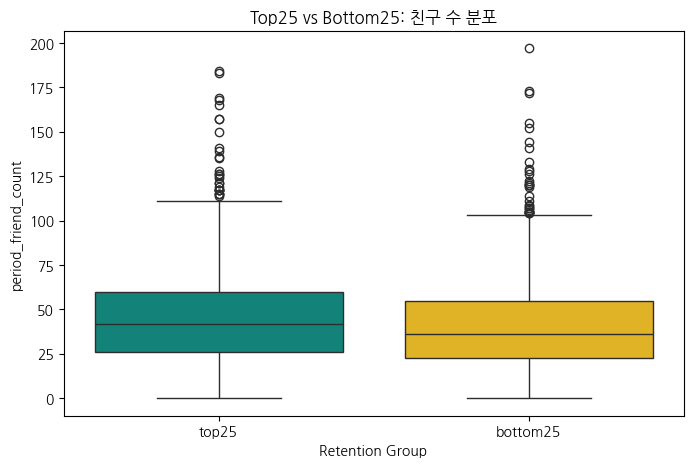

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=top_bottom_df,
    x="retention_group",
    y="period_friend_count",
    palette={"top25": "#009688", "bottom25": "#ffc107"}
)
plt.title("Top25 vs Bottom25: 친구 수 분포")
plt.ylabel("period_friend_count")
plt.xlabel("Retention Group")
plt.show()

In [ ]:
top = top_bottom_df[top_bottom_df["retention_group"] == "top25"]["days_to_vote"]
bottom = top_bottom_df[top_bottom_df["retention_group"] == "bottom25"]["days_to_vote"]

t_stat, p_val = ttest_ind(top, bottom, equal_var=False)
print(" 가입 후 첫 투표까지 걸린 일수 t-test")
print(f"Top25 평균: {top.mean():.2f}, Bottom25 평균: {bottom.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

✅ 가입 후 첫 투표까지 걸린 일수 t-test
Top25 평균: 0.65, Bottom25 평균: 0.25
T-statistic: 5.882, P-value: 0.0000


In [ ]:
top = top_bottom_df[top_bottom_df["retention_group"] == "top25"]["total_read"]
bottom = top_bottom_df[top_bottom_df["retention_group"] == "bottom25"]["total_read"]

t_stat, p_val = ttest_ind(top, bottom, equal_var=False)
print(" 받은 질문 열람 수 t-test")
print(f"Top25 평균: {top.mean():.2f}, Bottom25 평균: {bottom.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

✅ 받은 질문 열람 수 t-test
Top25 평균: 161.19, Bottom25 평균: 90.75
T-statistic: 14.454, P-value: 0.0000


In [66]:
top_bottom_df["total_read"]

1        19.0
7        80.0
8       182.0
9       138.0
11      281.0
        ...  
4672    120.0
4673      0.0
4674    145.0
4675      0.0
4676     27.0
Name: total_read, Length: 2497, dtype: float64

In [67]:
top_bottom_df["total_read"] = top_bottom_df["total_read"].fillna(0)


In [68]:
top_bottom_df["total_read"].isnull().sum()

0

In [81]:
top1 = top_bottom_df[top_bottom_df["retention_group"] == "top25"]["total_read"]
bottom1 = top_bottom_df[top_bottom_df["retention_group"] == "bottom25"]["total_read"]

t_stat, p_val = ttest_ind(top1, bottom1, equal_var=False)
print("✅ 받은 질문 열람 수 t-test")
print(f"Top25 평균: {top1.mean():.2f}, Bottom25 평균: {bottom1.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

✅ 받은 질문 열람 수 t-test
Top25 평균: 161.19, Bottom25 평균: 90.75
T-statistic: 14.454, P-value: 0.0000


In [82]:
top1.count()

1253

In [83]:
bottom1.count()

1244